In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [140]:
def smooth_curve_running_avg(y, window_size=10):
    return np.convolve(y, np.ones(window_size)/window_size, mode='valid')

In [141]:
def load_and_process_csv(file_path, window_size=10):
    df = pd.read_csv(file_path)
    runs = {}

    for column in df.columns:
        if ' - loss' in column and '__MIN' not in column and '__MAX' not in column:
            run_name = column.split(' - ')[0]
            if run_name not in runs:
                runs[run_name] = {
                    'step': [],
                    'loss': [],
                    'loss_min': [],
                    'loss_max': []
                }
            runs[run_name]['step'].extend(df['Step'].values)
            runs[run_name]['loss'].extend(df[column].values)
            runs[run_name]['loss_min'].extend(df[run_name + ' - loss__MIN'].values)
            runs[run_name]['loss_max'].extend(df[run_name + ' - loss__MAX'].values)

    # 平滑处理
    for run_name in runs:
        smoothed_loss = smooth_curve_running_avg(np.array(runs[run_name]['loss']), window_size)
        valid_steps = runs[run_name]['step'][:len(smoothed_loss)]
        runs[run_name]['step'] = valid_steps
        runs[run_name]['loss'] = smoothed_loss
        runs[run_name]['loss_min'] = np.array(runs[run_name]['loss_min'])[:len(smoothed_loss)]
        runs[run_name]['loss_max'] = np.array(runs[run_name]['loss_max'])[:len(smoothed_loss)]

    return runs

In [142]:
def plot_runs(runs_1, runs_2, label_1, label_2):
    plt.figure(figsize=(10, 6))
    
    for run_name, data in runs_1.items():
        # 绘制平滑后的损失曲线
        plt.plot(data['step'], data['loss'], label=label_1, color='green')
        # 在曲线的上方和下方绘制阴影区间，表示MIN和MAX
        plt.fill_between(data['step'], data['loss_min'], data['loss_max'], alpha=0.3, label=f'{label_1} - Range', color='green')

    for run_name, data in runs_2.items():
        # 绘制平滑后的损失曲线
        plt.plot(data['step'], data['loss'], label=label_2, color='orange')
        # 在曲线的上方和下方绘制阴影区间，表示MIN和MAX
        plt.fill_between(data['step'], data['loss_min'], data['loss_max'], alpha=0.3, label=f'{label_2} - Range', color='orange')
    
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title('Training Loss Comparison')
    plt.legend()
    plt.show()

In [143]:
# 加载并处理CSV文件
file_path_1 = './wenjian/ulip_chair_canny_rotation - phase_1.csv'
file_path_2 = './wenjian/ulip_chair_canny_rotation_3d - phase_1.csv'

In [144]:
window_size = 50
runs_1 = load_and_process_csv(file_path_1, window_size=window_size)
runs_2 = load_and_process_csv(file_path_2, window_size=window_size)

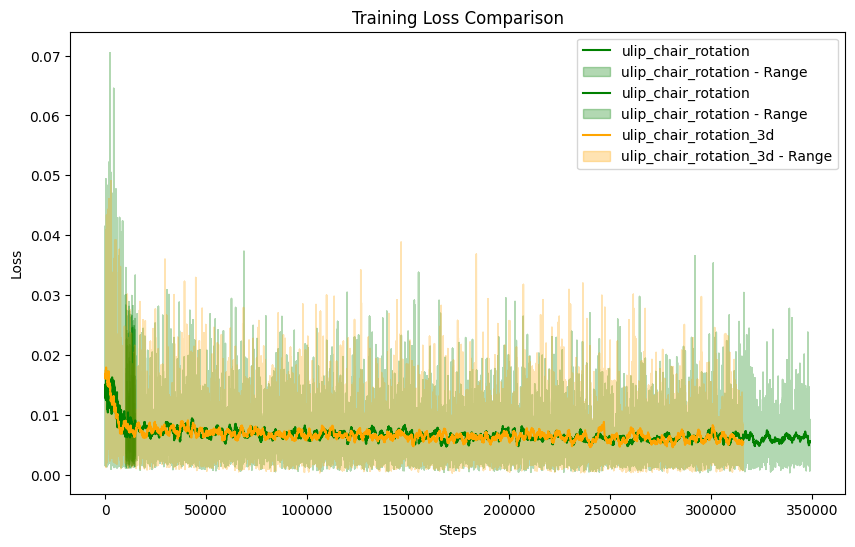

In [145]:
# 绘制曲线
plot_runs(runs_1, runs_2, 'ulip_chair_rotation', 'ulip_chair_rotation_3d')

In [146]:
# 加载并处理CSV文件
file_path_1 = './wenjian/ulip_plane_canny_rotation - phase_1.csv'
file_path_2 = './wenjian/ulip_plane_canny_rotation_3d - phase_1.csv'

In [147]:
window_size = 30
runs_1 = load_and_process_csv(file_path_1, window_size=window_size)
runs_2 = load_and_process_csv(file_path_2, window_size=window_size)

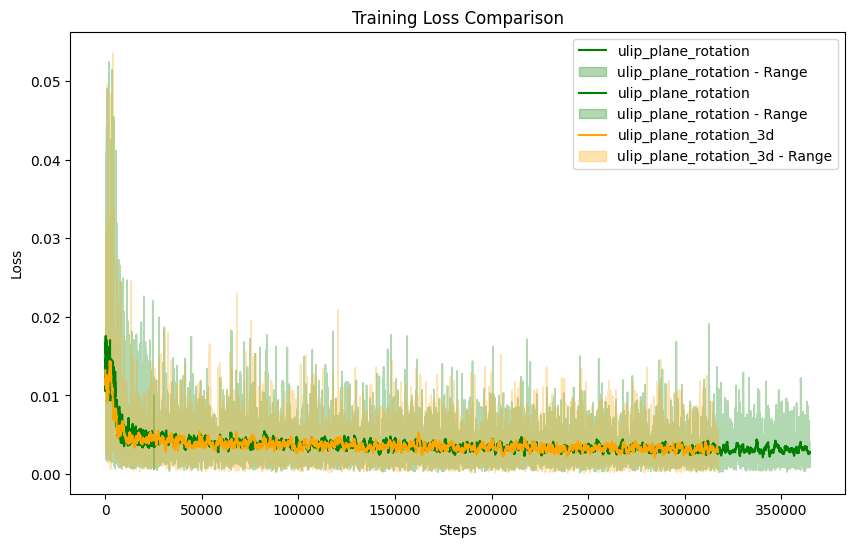

In [148]:
# 绘制曲线
plot_runs(runs_1, runs_2, 'ulip_plane_rotation', 'ulip_plane_rotation_3d')